In [1]:
import numpy as np
from scipy.optimize import minimize,basinhopping
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import FancyArrowPatch

In [4]:
import math

math.cos(45*math.pi/180)

0.7071067811865476

In [33]:
# Function definitions
def payload_i (x,y,beta_i):
    Hi=np.exp(-beta_i *y/x) -x**2 *(1-np.exp(-y/x))
    return Hi


def payload_mission(x,y,sequence):
    H_list=[]
    for beta_i in sequence:
        H_list.append(payload_i(x,y,beta_i))
    Hm=np.min(H_list)
    return Hm


def time_coeff (x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau


def specific_fuel_cons(x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    Hm=payload_mission(x,y,sequence)
    f=mp_refuel/Hm
    return f

In [34]:
def jacobian_tau(x,y,sequence):
    return (y/x)/(1-np.exp(-y/x))*np.exp(-sequence*y/x)


def taylored_tau(x,y,sequence):
    r=y/x
    mp_refuel= r-(1/2)*r**2*np.sum(sequence**2)+(1/6)*r**3*np.sum(sequence**3)-(1/24)*r**4*np.sum(sequence**4)
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau



# Optimization of $H_m$ as a function of $n$

In [ ]:
def opt_H(x,y,n):
    return np.exp(-(1/n) *y/x) -x**2 *(1-np.exp(-y/x))

def opt_G(x,y,n,K):
    return np.exp(-(1/n) *y/x) -x**2 *(1-np.exp(-y/x)) - K*(1-np.exp(-(1/n) *y/x))

def mass_tank(x,y,n,K):
    return  (1+K)*(1-np.exp(-(1/n) *y/x))

def H_infty(x,y):
    return 1 -x**2 *(1-np.exp(-y/x))

In [36]:
y=0.8
x=0.4
K=0.1

n=np.arange(1,51,1)
H_opt=opt_H(x,y,n)
G_opt=opt_G(x,y,n,K)
m_tank=mass_tank(x,y,n,K)
limit_H=H_infty(x,y)
limit_H

0.861653645317858

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


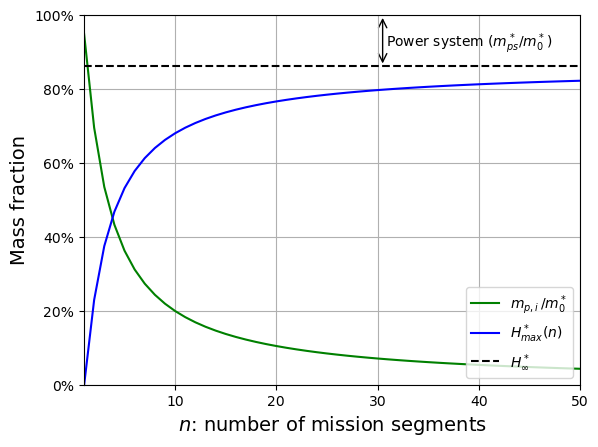

In [37]:
fig=plt.plot(figsize=(8,8),dpi=150)
plt.plot(n,m_tank,"g-",label=rf"$m_{{p,i}}\,/m_0^*$")
plt.plot(n,H_opt,"b-",label=rf"$H^*_{{max}}(n)$")
plt.plot(np.array([n[0],n[-1]]),np.array([limit_H,limit_H]),"--k",label=rf"$H^*_{{\infty}}$")

plt.xlabel(r'$n$: number of mission segments',fontsize=14)  
plt.ylabel(r'Mass fraction',fontsize=14)   
plt.xlim([1,n[-1]])
plt.ylim([0,1])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))


# Add the double arrow at a specific location
start_point = (30.5, 1)  # Set the start point of the double arrow
end_point = (30.5, limit_H)    # Set the end point of the double arrow
arrow = FancyArrowPatch(start_point, end_point, arrowstyle='<->',lw=1, mutation_scale=15, color='k')
plt.gca().add_patch(arrow)

# Add the text label for the double arrow
plt.text(39, 0.89, r"Power system ($m_{ps}^*/m_0^*$)", ha='center', va='bottom', color='k', fontsize=10)


plt.grid(True)
plt.legend(loc="lower right")
plt.savefig("figures/electric/H_vs_n.eps",bbox_inches='tight')

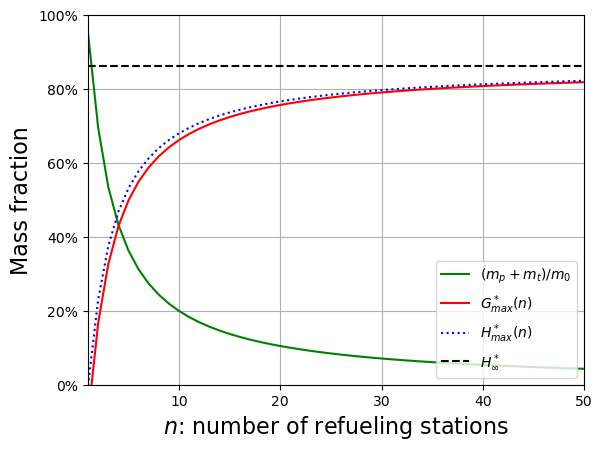

In [ ]:
fig=plt.plot(figsize=(8,8),dpi=150)
plt.plot(n,m_tank,"g-",label=rf"$(m_p+ m_t)/m_0$")
plt.plot(n,G_opt,"r-",label=rf"$G^*_{{max}}(n)$")
plt.plot(n,H_opt,"b:",label=rf"$H^*_{{max}}(n)$")
plt.plot(np.array([n[0],n[-1]]),np.array([limit_H,limit_H]),"--k",label=rf"$H_{{\infty}}^*$")

plt.xlabel(r'$n$: number of refueling stations',fontsize=16)  
plt.ylabel(r'Mass fraction',fontsize=16)   
plt.xlim([1,n[-1]])
plt.ylim([0,1])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.grid(True)
plt.legend(loc="lower right")
plt.savefig("figures/electric/G_vs_n.png")

## Optimal specific impulse c

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


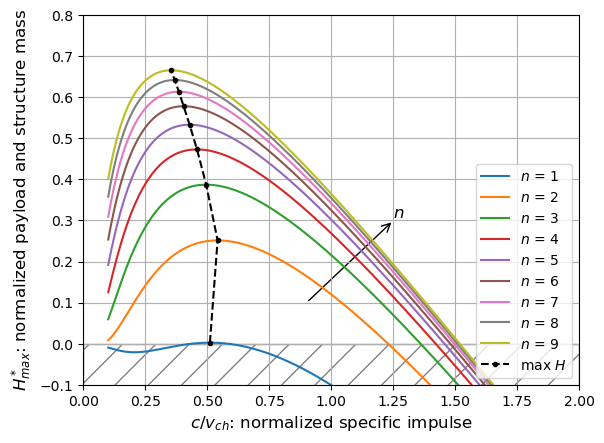

In [39]:
y=0.8
x_vec=np.arange(.1,2,0.001)
n_vec=np.arange(1,10,1)

max_H=[]
opt_x=[]

fig=plt.plot(figsize=(8,8),dpi=150)
for n in n_vec:
    H_opt_old=opt_H(x_vec,y,n)
    max_H.append(np.max(H_opt_old))
    opt_x.append(x_vec[np.argmax(H_opt_old)])
        
    plt.plot(x_vec,H_opt_old,label=f"$n$ = {n}")
    
plt.plot(opt_x,max_H,"k.--",label=f"max $H$")
    
    
aa=np.array([-1,-1])
plt.fill_between(np.array([0,2]), aa, where=(aa < 0), color='none', edgecolor='gray', hatch='/', interpolate=True)


start_point = (0.90, 0.1)  # Set the start point of the double arrow
end_point = (1.25, 0.3)    # Set the end point of the double arrow
arrow = FancyArrowPatch(start_point, end_point, arrowstyle='->',lw=1, mutation_scale=15, color='k')
plt.gca().add_patch(arrow)
plt.text(1.27, 0.30, r"$n$", ha='center', va='bottom', color='k', fontsize=12)
 
plt.xlim([0,2])
plt.ylim([-.1,.8])

plt.xlabel('$c/v_{ch}$: normalized specific impulse',fontsize=12)  
plt.ylabel('$H^*_{max}$: normalized payload and structure mass',fontsize=12) 
plt.legend(loc="lower right")  
plt.grid(True)
plt.savefig("figures/electric/HvsC_refueling.eps",bbox_inches='tight')



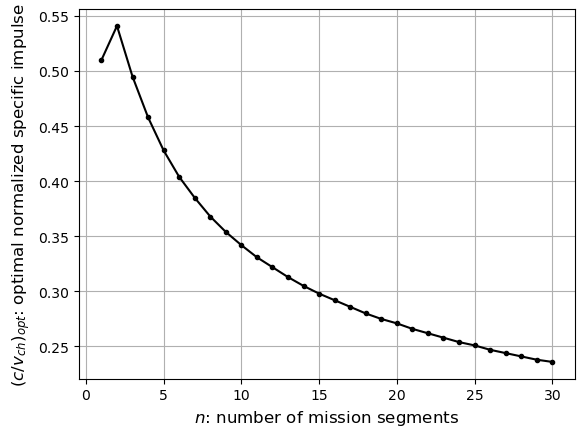

In [40]:
y=0.8
x_vec=np.arange(.01,2,0.001)
n_vec=np.arange(1,31,1)

max_H=[]
opt_x=[]
for n in n_vec:
    H_opt=opt_H(x_vec,y,n)
    max_H.append(np.max(H_opt))
    opt_x.append(x_vec[np.argmax(H_opt)])
        
    
plt.plot(n_vec,opt_x,"k.-")
plt.xlabel('$n$: number of mission segments',fontsize=12) 
plt.ylabel('$(c/v_{ch})_{opt}$: optimal normalized specific impulse',fontsize=12)   
plt.grid(True)
plt.savefig("figures/electric/optc_vsn.eps",bbox_inches='tight')

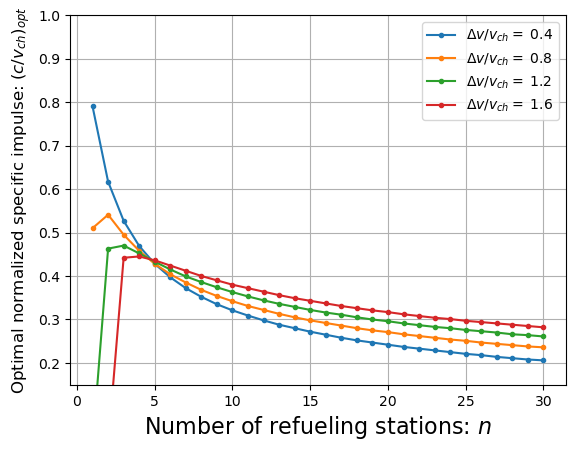

In [41]:
y_vec=np.arange(0.4,1.6,0.4)
x_vec=np.arange(.01,2,0.001)
n_vec=np.arange(1,31,1)

for y in y_vec:
    max_H=[]
    opt_x=[]
    for n in n_vec:
        H_opt=opt_H(x_vec,y,n)
        max_H.append(np.max(H_opt))
        opt_x.append(x_vec[np.argmax(H_opt)])
            
            
    plt.plot(n_vec,opt_x,".-",label=rf"$\Delta v/v_{{ch}}=$ {y:.1f}")
plt.xlabel('Number of refueling stations: $n$',fontsize=16) 
plt.ylabel('Optimal normalized specific impulse: $(c/v_{ch})_{opt}$',fontsize=12)   
plt.grid(True)
plt.ylim([.15,1])
plt.legend()
plt.savefig("figures/electric/optc_vsn_many.png",bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

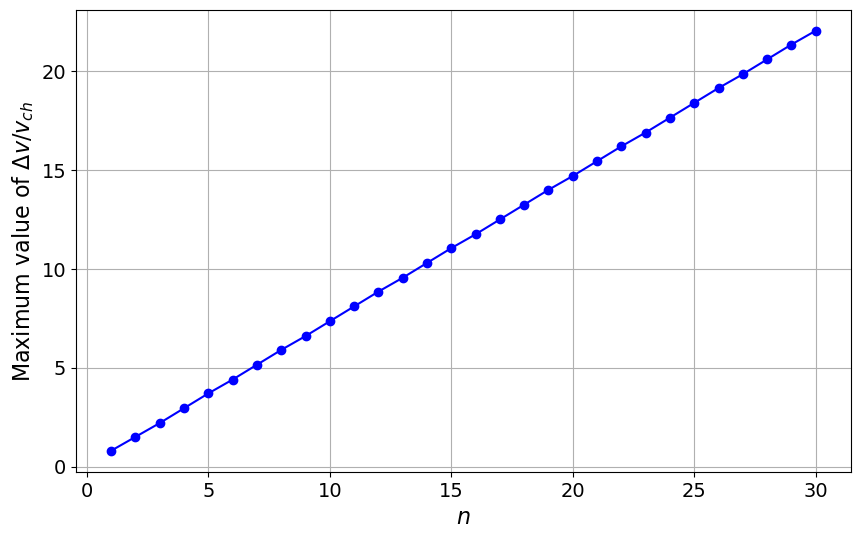

In [42]:
y_vec=np.arange(0,25,0.05)
x_vec=np.arange(.1,2,0.001)
n_vec=np.arange(1,31,1)


y_closest_to_zero = {}

for n in n_vec:
    max_H=[]
    for y in y_vec:
        H_opt_old=opt_H(x_vec,y,n)
        max_H.append(np.max(H_opt_old)) 
    # Find the r1 value where H is closest to 0
    closest_index = np.argmin(np.abs(max_H))
    y_closest_to_zero[n] = y_vec[closest_index]
    
    
 # Plot r1_closest_to_zero vs beta
fig=plt.figure(figsize=(10,6)) 
n = list(y_closest_to_zero.keys())
y_vals = list(y_closest_to_zero.values())

plt.figure(figsize=(10, 6))
plt.plot(n, y_vals, 'ob-')
#plt.xlim([0,1.01])

plt.xlabel(r'$n$',fontsize=16)
plt.ylabel(r'Maximum value of $\Delta v/v_{ch}$',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig("figures/electric/max_delv.png")

plt.show()

# Optimization of $\tau$ as a function of $n$

In [43]:
y=.8
x=.4
n=np.arange(1,11,1)

In [44]:
def max_tau(x,y,n):
    return n*(1-np.exp(-(1/n)*y/x))/(1-np.exp(-y/x))

def analytical_lim_tau(x,y):
    return y/x/(1-np.exp(-y/x))

In [45]:
tau_max=max_tau(x,y,n)
limit_tau=analytical_lim_tau(x,y)

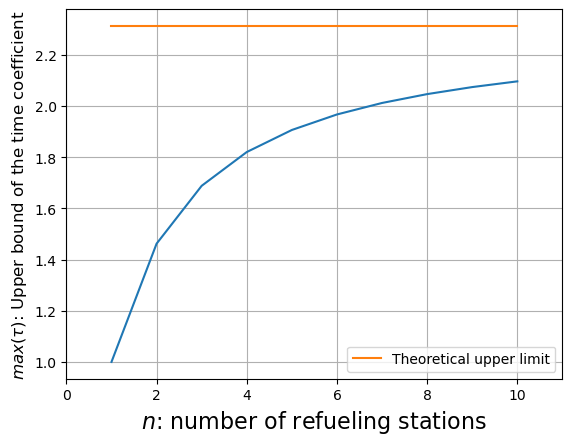

In [46]:
fig=plt.plot(figsize=(8,8))
plt.plot(n,tau_max)
plt.plot(np.array([n[0],n[-1]]),np.array([limit_tau,limit_tau]),label="Theoretical upper limit")

plt.xlabel(r'$n$: number of refueling stations',fontsize=16)  
plt.ylabel(r'$max(\tau)$: Upper bound of the time coefficient',fontsize=12)   
plt.xlim([0,n[-1]+1])
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig("figures/electric/tau_vs_n.png")

# Optimization under constraints

In [47]:
# Constraint functions

def constraint_sum_beta(sequence):
    return np.sum(sequence) - 1

def constraint_payload_min(x, y, sequence, H_min):
    return payload_mission(x, y, sequence) - H_min

def constraint_tau_max(x, y,sequence, tau_max):
    return tau_max - time_coeff(x, y, sequence)

def constraint_f_max( x, y,sequence, f_max):
    return f_max - specific_fuel_cons(x, y, sequence)

In [17]:
y=0.8
x=1.2
H_max=opt_H(x,y,n)
H_min = 0.80*H_max
tau_max = 1.5
f_max = 1.5
n = 10
beta_initial = np.random.rand(n)
beta_initial= beta_initial/np.sum(beta_initial)

bounds = [(0, 1)] * n

# Constraints with parameters
constraints = [
    {'type': 'eq', 'fun': constraint_sum_beta},
    {'type': 'ineq', 'fun': lambda beta: constraint_payload_min(x, y,beta, H_min)},
    {'type': 'ineq', 'fun': lambda beta: constraint_f_max( x, y,beta, f_max)},
]

print("H_max=",H_max)

H_max= [-0.18726223  0.01585196  0.10005805  0.14580238  0.17449397  0.19415997
  0.20847709  0.21936507  0.22792356  0.23482764]


In [18]:
beta_initial = np.full(n, 1/n)
result = minimize(
    lambda beta: time_coeff(x, y, beta),
    beta_initial,
    method='SLSQP',
    jac= lambda beta: jacobian_tau(x,y,beta),
    constraints=constraints,
    bounds=bounds,
    options={'maxiter': 1000, 'disp': True}
)

# Results
if result.success:
    print(f"Optimal sequence: {[f'{beta:.3f}' for beta in result.x]}")
    print(f"Payload mission: {payload_mission(x, y, result.x):.3f}")
    print(f"Time coeff: {time_coeff(x, y, result.x):.3f}")
    print(f"Specific fuel cons: {specific_fuel_cons(x, y, result.x):.3f}")
else:
    print("Optimization failed:", result.message)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1.3254271264159427
            Iterations: 15
            Function evaluations: 86
            Gradient evaluations: 11
Optimization failed: Positive directional derivative for linesearch


In [12]:
beta_initial = np.array([1,0,0,0,0])
result = minimize(
    lambda beta: time_coeff(x, y, beta),
    beta_initial,
    method='SLSQP',
    jac= lambda beta: jacobian_tau(x,y,beta),
    constraints=constraints,
    bounds=bounds,
    options={'maxiter': 1000, 'disp': True}
)

# Results
if result.success:
    print(f"Optimal sequence: {[f'{beta:.3f}' for beta in result.x]}")
    print(f"Payload mission: {payload_mission(x, y, result.x):.3f}")
    print(f"Time coeff: {time_coeff(x, y, result.x):.3f}")
    print(f"Specific fuel cons: {specific_fuel_cons(x, y, result.x):.3f}")
else:
    print("Optimization failed:", result.message)

ValueError: The number of bounds is not compatible with the length of `x0`.

In [15]:

iterations=5000
n=10
bounds = [(0, 1)] * n

tau_values=[]

np.seed=567
for i in range(iterations):


    beta_initial = np.random.rand(n)
    beta_initial= beta_initial/np.sum(beta_initial)
            
            
    result = minimize(
    lambda beta: time_coeff(x, y, beta),
    beta_initial,
    method='SLSQP',
    jac= lambda beta: jacobian_tau(x,y,beta),
    constraints=constraints,
    bounds=bounds,
    options={'maxiter': 1000, 'disp': False}
)   
    
    tau_values.append(time_coeff(x, y, result.x))


    

KeyboardInterrupt: 

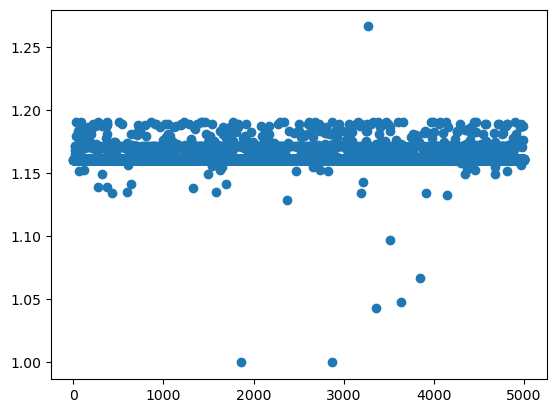

In [41]:
plt.scatter(np.arange(1,iterations+1),tau_values)

# Basin-hopping

### Case 1:

In [28]:
y=0.25
x=1.03
n = 10

H_max=opt_H(x,y,10)
H_inf=H_infty(x,y)
#H_min = 0.98*H_max
H_min = 0.93*H_inf
f_max = 0.33

beta_initial = np.random.rand(n)
beta_initial= beta_initial/np.sum(beta_initial)
bounds = [(0, 1)] * n

In [51]:
tau_max=max_tau(x,y,n)
print(tau_max)
limit_tau=analytical_lim_tau(x,y)
print(limit_tau)

[1.         1.46211716 1.68822506 1.82021694 1.90640342 1.96701924
 2.01194627 2.04656638 2.07405638 2.09641082]
2.3130352854993315


In [30]:
print(H_min)
print(H_max)
print(H_inf)


0.7173721877741019
0.7473882916142618
0.7713679438431204


In [48]:
# Constraints with parameters
constraints = [
    {'type': 'eq', 'fun': constraint_sum_beta},
    {'type': 'ineq', 'fun': lambda beta: constraint_payload_min(x, y,beta, H_min)},
    {'type': 'ineq', 'fun': lambda beta: constraint_f_max( x, y,beta, f_max)},
]


In [49]:
# Define the local optimizer function to be used by basinhopping
def local_minimizer(beta):
    return minimize(
        lambda beta: time_coeff(x, y, beta),
        beta,
        method='SLSQP',
        jac=lambda beta: jacobian_tau(x, y, beta),
        constraints=constraints,
        bounds=bounds,
        options={'maxiter': 1000, 'disp': False, 'ftol': 1e-8}
    )
    
    
# Set up the basinhopping optimizer
minimizer_kwargs = {
    'method': 'SLSQP',  # Using SLSQP for constraints
    'constraints': constraints,
    'bounds': bounds
}

In [50]:
result = basinhopping(
    lambda beta: time_coeff(x, y, beta),  # Objective function
    beta_initial,  # Initial guess
    minimizer_kwargs=minimizer_kwargs,  # Local optimizer settings
    niter=250,  # Number of iterations for basinhopping
    stepsize=0.05,  # Step size for random hopping
    T=0.1,  # Temperature for accepting worse solutions
    disp=False  # Display progress
)

In [422]:
print(f"Optimal sequence: {[f'{beta:.3f}' for beta in np.sort(result.x)[::-1]]}")
print(f"Payload mission: {payload_mission(x, y, result.x):.3f}")
print(f"Time coeff: {time_coeff(x, y, result.x):.3f}")
print(f"Specific fuel cons: {specific_fuel_cons(x, y, result.x):.3f}")

Optimal sequence: ['0.229', '0.229', '0.229', '0.229', '0.085', '0.000', '0.000', '0.000', '0.000', '0.000']
Payload mission: 0.717371
Time coeff: 1.097
Specific fuel cons: 0.330


### Case 2:

In [254]:
y=0.22
x=0.90
n = 10

H_max=opt_H(x,y,n)
H_inf=H_infty(x,y)
H_min = 0.6*H_inf
f_max = 0.3

beta_initial = np.random.rand(n)
beta_initial= beta_initial/np.sum(beta_initial)
bounds = [(0, 1)] * n

print(H_min)
print(H_max)
print(H_inf)

0.494605794524586
0.8001948922813235
0.82434299087431


In [255]:
# Define the local optimizer function to be used by basinhopping
def local_minimizer(beta):
    return minimize(
        lambda beta: time_coeff(x, y, beta),
        beta,
        method='SLSQP',
        jac=lambda beta: jacobian_tau(x, y, beta),
        constraints=constraints,
        bounds=bounds,
        options={'maxiter': 1000, 'disp': False}
    )
    
    
# Set up the basinhopping optimizer
minimizer_kwargs = {
    'method': 'SLSQP',  # Using SLSQP for constraints
    'constraints': constraints,
    'bounds': bounds
}

In [256]:
result = basinhopping(
    lambda beta: time_coeff(x, y, beta),  # Objective function
    beta_initial,  # Initial guess
    minimizer_kwargs=minimizer_kwargs,  # Local optimizer settings
    niter=200,  # Number of iterations for basinhopping
    stepsize=0.05,  # Step size for random hopping
    T=0.1,  # Temperature for accepting worse solutions
    disp=False  # Display progress
)

In [257]:
print(f"Optimal sequence: {[f'{beta:.3f}' for beta in np.sort(result.x)[::-1]]}")
print(f"Payload mission:| {payload_mission(x, y, result.x):.3f}")
print(f"Time coeff: {time_coeff(x, y, result.x):.3f}")
print(f"Specific fuel cons: {specific_fuel_cons(x, y, result.x):.3f}")

Optimal sequence: ['0.181', '0.179', '0.179', '0.175', '0.173', '0.062', '0.051', '0.000', '0.000', '0.000']
Payload mission:| 0.781
Time coeff: 1.105
Specific fuel cons: 0.307


_____

In [79]:
iterations=50
results=[]
for i in range(iterations):
    beta_initial = np.random.rand(n)
    beta_initial= beta_initial/np.sum(beta_initial)
    
    result = basinhopping(
    lambda beta: time_coeff(x, y, beta),  # Objective function
    beta_initial,  # Initial guess
    minimizer_kwargs=minimizer_kwargs,  # Local optimizer settings
    niter=200,  # Number of iterations for basinhopping
    stepsize=0.1,  # Step size for random hopping
    disp=False  # Display progress
)
    results.append(result.fun)
    

KeyboardInterrupt: 

(1.0, 1.2)

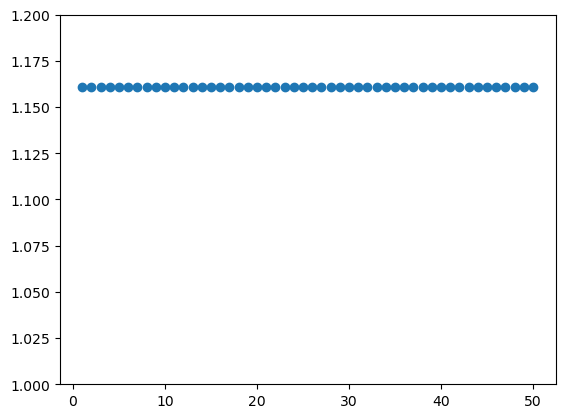

In [67]:
plt.scatter(np.arange(1,np.size(results)+1),results)
plt.ylim([1,1.2])

# Tests